<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-I/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere la función pulso unitario:

$$f(x)=1 \text{ si} -1 \leq x \leq 1, 0 \text{ en otro caso.}$$

a. Grafique esta función.

b. Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.

c. Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso b.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.special import sici #Para la función Si

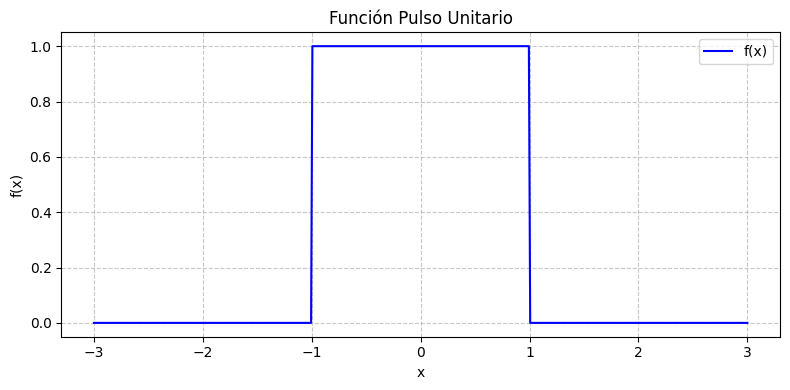

In [33]:
#a. Graficar la función
def funcion_original(x):
    return np.piecewise(x,
                        [np.abs(x) < 1, np.abs(x) == 1, np.abs(x) > 1],
                        [1, 0.5, 0])

#Para el eje x, graficamos de -3 a 3
x = np.linspace(-3, 3, 1000)
y = funcion_original(x)

#Grafica
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', label='f(x)')
plt.title('Función Pulso Unitario')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

A(w) = Piecewise((2*sin(w)/(pi*w), (w > 0) | (w < 0)), (2/pi, True))
B(w) = 0


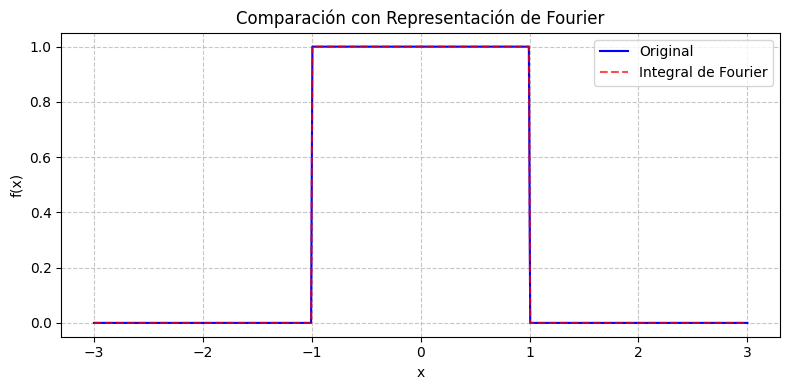

In [34]:
#b.Representación como integral de Fourier
#Símbolos
v, w = sp.symbols('v w', real=True)
x_sym = sp.symbols('x', real=True)

#Calcular A(w) y B(w)
A_w = (1/sp.pi) * sp.integrate(sp.cos(w*v), (v, -1, 1))
A_w = sp.simplify(A_w)
B_w = 0

print(f"A(w) = {A_w}")
print(f"B(w) = {B_w}")

#Graficar junto a la función original
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', label='Original')
plt.plot(x, y, 'r--', label='Integral de Fourier', alpha=0.7)
plt.title('Comparación con Representación de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

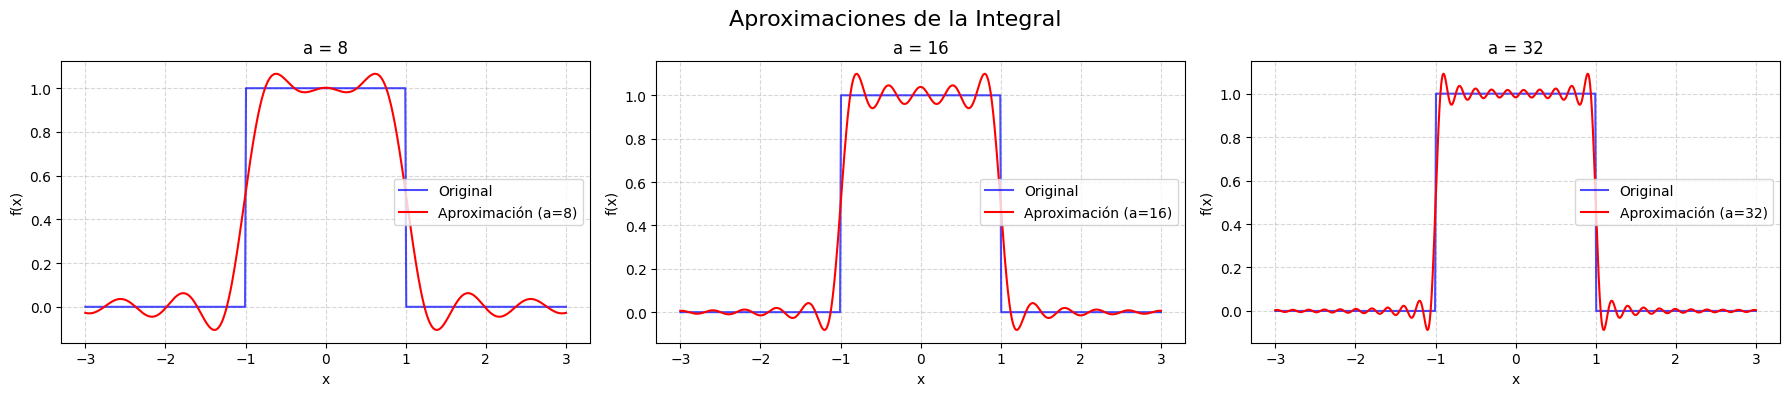

In [38]:
#c.Considere aproximaciones a la integral impropia
def f_approx(x, a):
    si1, _ = sici(a * (x + 1))  # Si(a(x+1))
    si2, _ = sici(a * (x - 1))  # Si(a(x-1))
    return (1 / np.pi) * (si1 - si2)

a_vals = [8, 16, 32] #valores de a
x_vals = np.linspace(-3, 3, 1000)

#3 graficas para a=8, a=16 y a=32
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Aproximaciones de la Integral', fontsize=16)

for i, a in enumerate(a_vals):
    y_approx = f_approx(x_vals, a)
    y_orig = funcion_original(x_vals)

    axs[i].plot(x_vals, y_orig, 'b-', label='Original', alpha=0.7)
    axs[i].plot(x_vals, y_approx, 'r-', label=f'Aproximación (a={a})')
    axs[i].set_title(f'a = {a}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()